## Завдання: 
Побудова моделi згорткових нейронних мереж для класифiкацiї зображень CIFAR-10

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.callbacks import TensorBoard
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from sklearn import metrics

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

Налаштування TensorBoard для відтворення та завантаження даних про навчання моделі:

In [4]:
log_dir = "/home/ilyahl/Documents/Education/bachelor/3_course/2_semester/decision_support_systems/lab4/log"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [5]:
%load_ext tensorboard

#### Підготовка даних:

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_test.shape

(10000, 1)

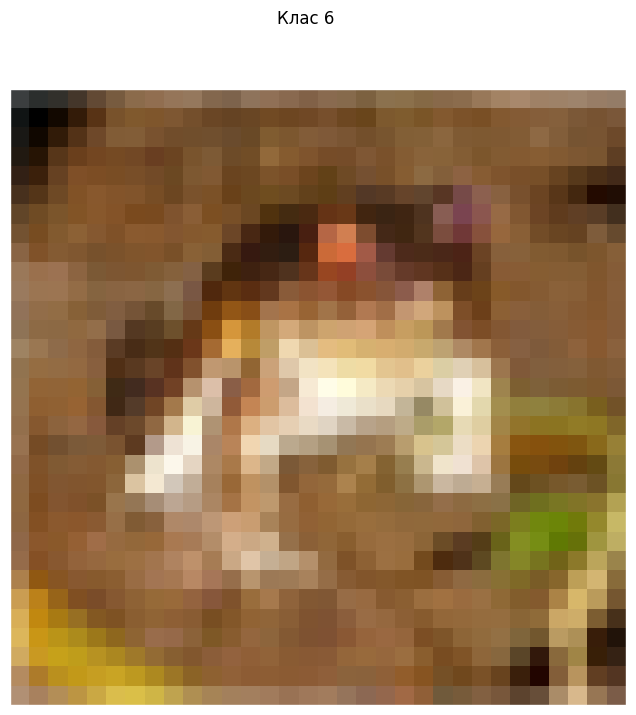

In [12]:
plt.imshow(x_train[0])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"Клас {y_train[0][0]}")
plt.show()

Перетворення міток класів в one-hot представлення

In [9]:
y_train = utils.to_categorical(y_train, 10)

In [14]:
y_train.shape

(50000, 10)

#### Побудова та порівняння моделей:

Побудова моделі з одним згортковоим шаром і шаром max pooling-у

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

/home/ilyahl/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-08 21:57:36.888434: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-08 21:57:36.889315: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skippi

In [15]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        81,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,826 (323.54 KB)

 Trainable params: 82,826 (323.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.fit(x_train, y_train, batch_size=200, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback], verbose=1);

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.2102 - loss: 51.6835 - val_accuracy: 0.3592 - val_loss: 2.2458
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4044 - loss: 1.9366 - val_accuracy: 0.4133 - val_loss: 1.8988
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4808 - loss: 1.5616 - val_accuracy: 0.4351 - val_loss: 1.7869
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5187 - loss: 1.3997 - val_accuracy: 0.4626 - val_loss: 1.7321
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5563 - loss: 1.2929 - val_accuracy: 0.4687 - val_loss: 1.7603
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5852 - loss: 1.2004 - val_accuracy: 0.4811 - val_loss: 1.7812
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6066 - loss: 1.1517 - val_accuracy: 0.4665 - val_loss: 1.8136
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6180 - loss: 1.0994 - val_acc

In [18]:
%tensorboard --logdir /home/ilyahl/Documents/Education/bachelor/3_course/2_semester/decision_support_systems/lab4/log

Reusing TensorBoard on port 6006 (pid 51601), started 2:24:42 ago. (Use '!kill 51601' to kill it.)

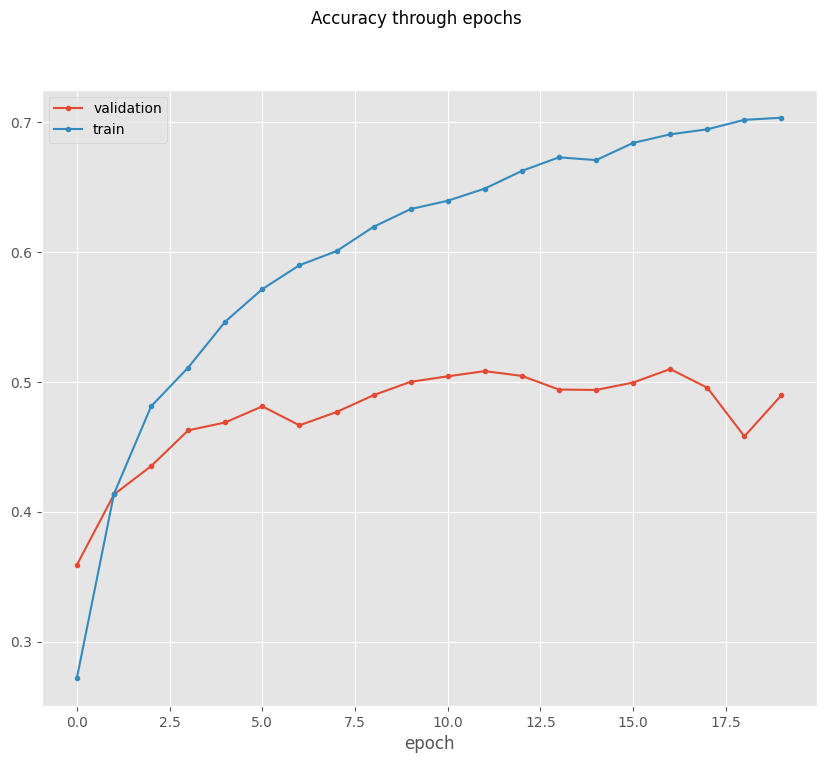

In [19]:
val_acc = pd.read_csv("val_acc.csv")["Value"]
train_acc = pd.read_csv("train_acc.csv")["Value"]
plt.plot(val_acc, marker=".", label="validation")
plt.plot(train_acc, marker=".", label="train")
plt.xlabel("epoch")
plt.suptitle("Accuracy through epochs")
plt.legend()
plt.show()

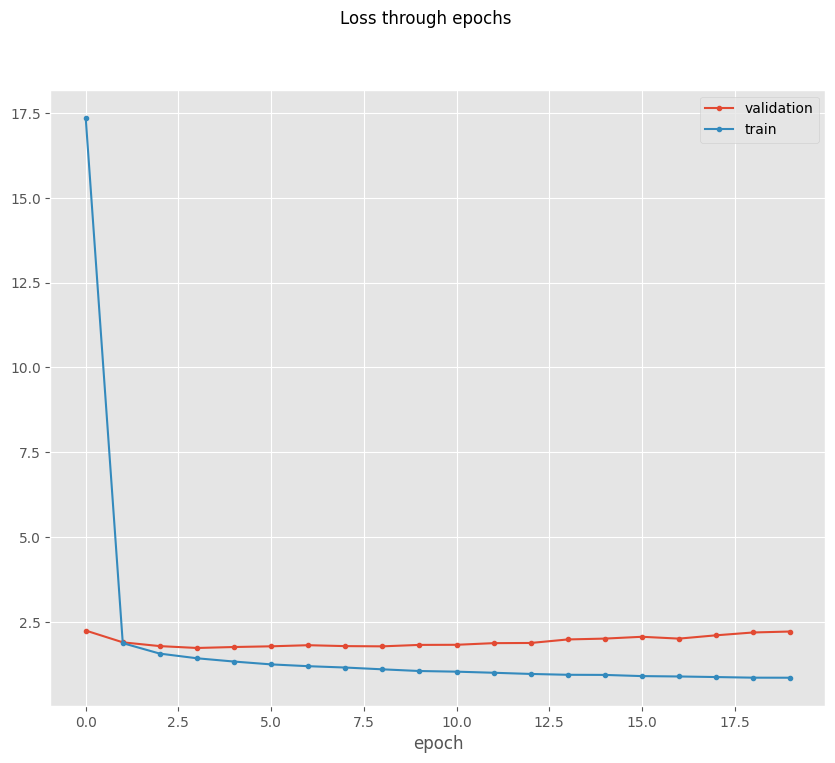

In [20]:
val_acc = pd.read_csv("val_loss.csv")["Value"]
train_acc = pd.read_csv("train_loss.csv")["Value"]
plt.plot(val_acc, marker=".", label="validation")
plt.plot(train_acc, marker=".", label="train")
plt.xlabel("epoch")
plt.suptitle("Loss through epochs")
plt.legend()
plt.show()

In [21]:
y_pred = np.argmax(model(x_test), axis=1)
y_true = np.reshape(y_test, (1, -1))[0]
print("Model quality on test set:")
print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision: {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F1-score: {metrics.f1_score(y_true, y_pred, average='weighted')}")
print(f"AUC: {metrics.roc_auc_score(y_true, model(x_test), multi_class='ovo')}")

Model quality on test set:
Accuracy: 0.4876
Precision: 0.4937754237013705
Recall: 0.4876
F1-score: 0.4864234438369912
AUC: 0.8597234999999998


Спробуємо налаштувати значення параметрy strides

In [26]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=200, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback], verbose=1);

/home/ilyahl/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1930 - loss: 26.5145 - val_accuracy: 0.3059 - val_loss: 3.1711
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3257 - loss: 2.4753 - val_accuracy: 0.3807 - val_loss: 1.9142
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4156 - loss: 1.7514 - val_accuracy: 0.4226 - val_loss: 1.7232
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4602 - loss: 1.5859 - val_accuracy: 0.4550 - val_loss: 1.6145
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4907 - loss: 1.4830 - val_accuracy: 0.4686 - val_loss: 1.5688
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5042 - loss: 1.4312 - val_accuracy: 0.4776 - val_loss: 1.5406
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5129 - loss: 1.4085 - val_accuracy: 0.4829 - val_loss: 1.5207
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5207 - loss: 1.3824 - val_accuracy: 0

In [27]:
y_pred = np.argmax(model(x_test), axis=1)
y_true = np.reshape(y_test, (1, -1))[0]
print("Model quality on test set:")
print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision: {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F1-score: {metrics.f1_score(y_true, y_pred, average='weighted')}")
print(f"AUC: {metrics.roc_auc_score(y_true, model(x_test), multi_class='ovo')}")

Model quality on test set:
Accuracy: 0.5395
Precision: 0.5458572236091017
Recall: 0.5395
F1-score: 0.5376618323510525
AUC: 0.8921907611111111


Отже, зміною параметру stride, ми змогли досягти трохи кращих результатів на перевірочній множині


Спробуємо налаштувати значення параметрy padding

In [28]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="valid", activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=200, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback], verbose=1);

/home/ilyahl/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.1726 - loss: 59.7820 - val_accuracy: 0.2518 - val_loss: 2.4810
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.2964 - loss: 2.2152 - val_accuracy: 0.3672 - val_loss: 2.0516
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4245 - loss: 1.7359 - val_accuracy: 0.4138 - val_loss: 1.8296
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4768 - loss: 1.5356 - val_accuracy: 0.4395 - val_loss: 1.7695
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4953 - loss: 1.4739 - val_accuracy: 0.4356 - val_loss: 1.7620
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5324 - loss: 1.3484 - val_accuracy: 0.4561 - val_loss: 1.6998
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5471 - loss: 1.3044 - val_accuracy: 0.4732 - val_loss: 1.7184
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5645 - loss: 1.2523 - val_acc

In [29]:
y_pred = np.argmax(model(x_test), axis=1)
y_true = np.reshape(y_test, (1, -1))[0]
print("Model quality on test set:")
print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision: {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F1-score: {metrics.f1_score(y_true, y_pred, average='weighted')}")
print(f"AUC: {metrics.roc_auc_score(y_true, model(x_test), multi_class='ovo')}")

Model quality on test set:
Accuracy: 0.4777
Precision: 0.48315094525671975
Recall: 0.4777
F1-score: 0.4767717585750372
AUC: 0.8544377333333333


При спробі змінити параметр padding не отримали значних змін в якості мережі

Спробуємо налаштувати значення параметрy kernel_size

In [30]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2, 2), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=200, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback], verbose=1);

/home/ilyahl/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.2238 - loss: 129.5666 - val_accuracy: 0.3989 - val_loss: 5.7164
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4321 - loss: 4.3794 - val_accuracy: 0.4345 - val_loss: 3.6708
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4893 - loss: 2.8004 - val_accuracy: 0.4538 - val_loss: 2.8887
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5270 - loss: 2.0691 - val_accuracy: 0.4720 - val_loss: 2.4367
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5513 - loss: 1.6914 - val_accuracy: 0.4788 - val_loss: 2.2720
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5699 - loss: 1.4642 - val_accuracy: 0.4827 - val_loss: 2.0784
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5878 - loss: 1.3224 - val_accuracy: 0.4878 - val_loss: 2.0067
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6119 - loss: 1.2312 - val_ac

In [31]:
y_pred = np.argmax(model(x_test), axis=1)
y_true = np.reshape(y_test, (1, -1))[0]
print("Model quality on test set:")
print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision: {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F1-score: {metrics.f1_score(y_true, y_pred, average='weighted')}")
print(f"AUC: {metrics.roc_auc_score(y_true, model(x_test), multi_class='ovo')}")

Model quality on test set:
Accuracy: 0.5208
Precision: 0.5348230970732064
Recall: 0.5208
F1-score: 0.5223805626891828
AUC: 0.8789128833333333


Змінивши розмір ядра, ми змогли трохи покращити показники моделі на тестовій множині

Спробуємо додати ще один згортковий та пулінговий шари

In [32]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

/home/ilyahl/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [33]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,634 (119.66 KB)

 Trainable params: 30,634 (119.66 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.fit(x_train, y_train, batch_size=200, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback], verbose=1);

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.1724 - loss: 13.3576 - val_accuracy: 0.3525 - val_loss: 1.8194
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.3697 - loss: 1.7621 - val_accuracy: 0.3910 - val_loss: 1.6975
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4163 - loss: 1.6240 - val_accuracy: 0.4407 - val_loss: 1.5744
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4670 - loss: 1.4966 - val_accuracy: 0.4900 - val_loss: 1.4465
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.5164 - loss: 1.3597 - val_accuracy: 0.5052 - val_loss: 1.4298
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5443 - loss: 1.2936 - val_accuracy: 0.5263 - val_loss: 1.3574
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.5682 - loss: 1.2326 - val_accuracy: 0.5332 - val_loss: 1.3309
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.5786 - loss: 1.2052 - val_acc

In [36]:
%tensorboard --logdir /home/ilyahl/Documents/Education/bachelor/3_course/2_semester/decision_support_systems/lab4/log

Reusing TensorBoard on port 6006 (pid 51601), started 2:44:34 ago. (Use '!kill 51601' to kill it.)

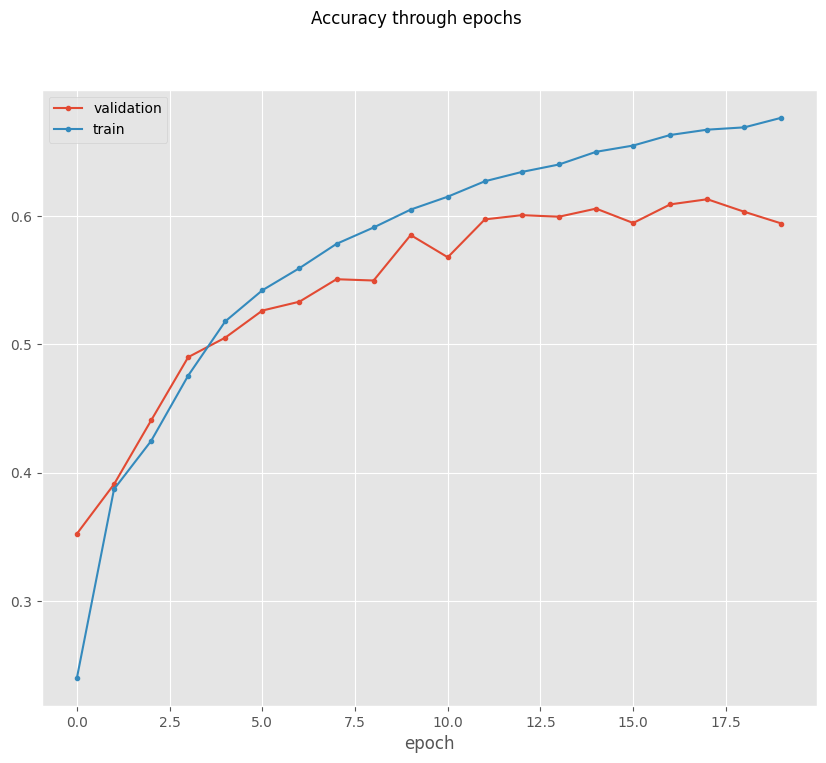

In [37]:
val_acc = pd.read_csv("val_acc.csv")["Value"]
train_acc = pd.read_csv("train_acc.csv")["Value"]
plt.plot(val_acc, marker=".", label="validation")
plt.plot(train_acc, marker=".", label="train")
plt.xlabel("epoch")
plt.suptitle("Accuracy through epochs")
plt.legend()
plt.show()

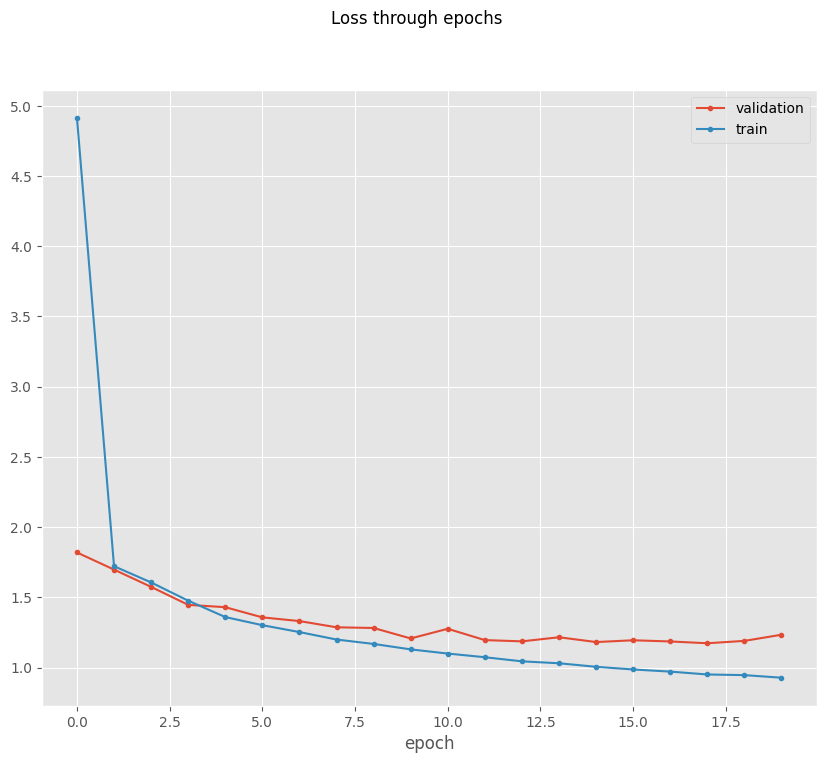

In [38]:
val_acc = pd.read_csv("val_loss.csv")["Value"]
train_acc = pd.read_csv("train_loss.csv")["Value"]
plt.plot(val_acc, marker=".", label="validation")
plt.plot(train_acc, marker=".", label="train")
plt.xlabel("epoch")
plt.suptitle("Loss through epochs")
plt.legend()
plt.show()

In [39]:
y_pred = np.argmax(model(x_test), axis=1)
y_true = np.reshape(y_test, (1, -1))[0]
print("Model quality on test set:")
print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision: {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F1-score: {metrics.f1_score(y_true, y_pred, average='weighted')}")
print(f"AUC: {metrics.roc_auc_score(y_true, model(x_test), multi_class='ovo')}")

Model quality on test set:
Accuracy: 0.594
Precision: 0.6137164774080182
Recall: 0.594
F1-score: 0.5922461946639597
AUC: 0.9191650777777779


Змогли досягнути кращих показників на тестовій множині

Спробуємо реалізувати архітектуру яка має вид декількох комбінацій шарів згортка-згортка-пулінг

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

/home/ilyahl/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,538 (416.16 KB)

 Trainable params: 106,538 (416.16 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(x_train, y_train, batch_size=200, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback], verbose=1);

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 33s 160ms/step - accuracy: 0.2638 - loss: 6.4238 - val_accuracy: 0.4818 - val_loss: 1.4512
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.5169 - loss: 1.3700 - val_accuracy: 0.5427 - val_loss: 1.2933
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.5844 - loss: 1.1810 - val_accuracy: 0.5949 - val_loss: 1.1712
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 178ms/step - accuracy: 0.6207 - loss: 1.0925 - val_accuracy: 0.6134 - val_loss: 1.1293
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 175ms/step - accuracy: 0.6537 - loss: 0.9915 - val_accuracy: 0.6325 - val_loss: 1.0784
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.6905 - loss: 0.8985 - val_accuracy: 0.6403 - val_loss: 1.0438
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 177ms/step - accuracy: 0.7159 - loss: 0.8199 - val_accuracy: 0.6393 - val_loss: 1.0483
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 34s 172ms/step - accuracy: 0.7271 - loss: 0

In [19]:
%tensorboard --logdir /home/ilyahl/Documents/Education/bachelor/3_course/2_semester/decision_support_systems/lab4/log

Reusing TensorBoard on port 6006 (pid 51601), started 4:40:35 ago. (Use '!kill 51601' to kill it.)

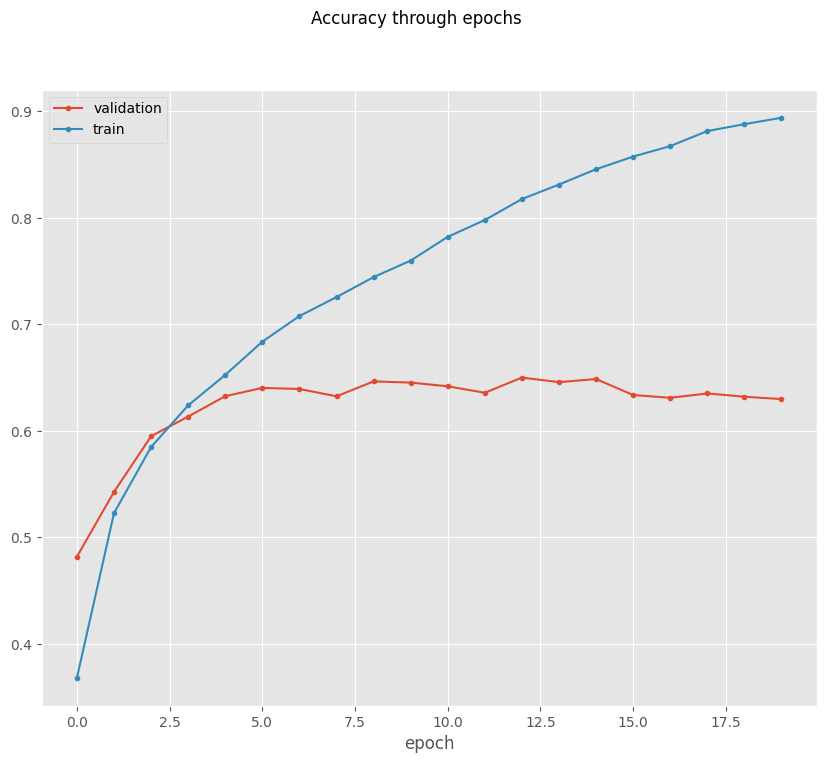

In [20]:
val_acc = pd.read_csv("val_acc.csv")["Value"]
train_acc = pd.read_csv("train_acc.csv")["Value"]
plt.plot(val_acc, marker=".", label="validation")
plt.plot(train_acc, marker=".", label="train")
plt.xlabel("epoch")
plt.suptitle("Accuracy through epochs")
plt.legend()
plt.show()

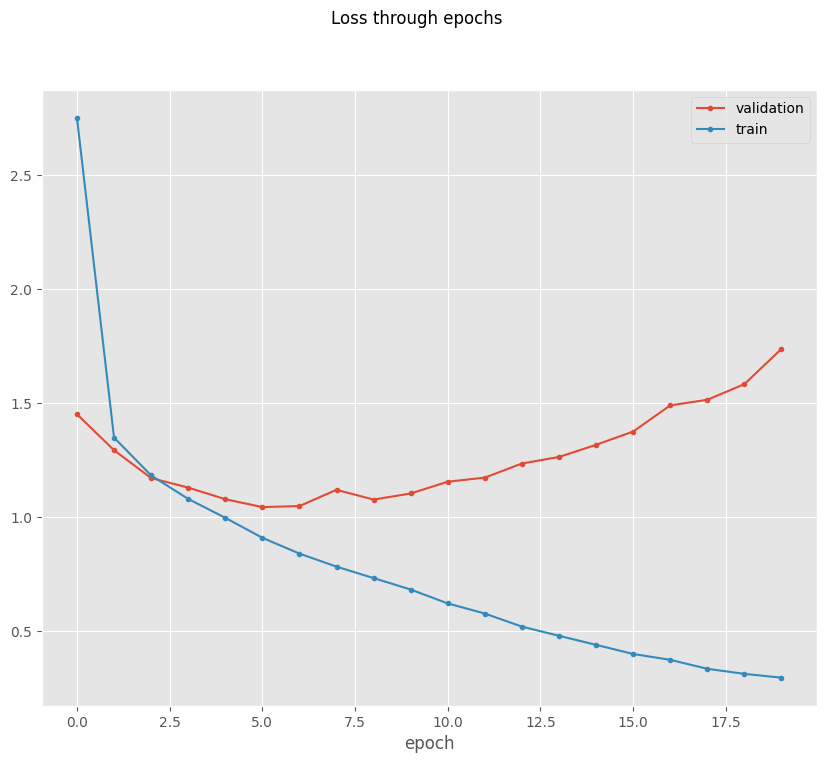

In [22]:
val_acc = pd.read_csv("val_loss.csv")["Value"]
train_acc = pd.read_csv("train_loss.csv")["Value"]
plt.plot(val_acc, marker=".", label="validation")
plt.plot(train_acc, marker=".", label="train")
plt.xlabel("epoch")
plt.suptitle("Loss through epochs")
plt.legend()
plt.show()

In [26]:
y_pred_ = model.predict(x_test)
y_pred = np.argmax(y_pred_, axis=1)
y_true = np.reshape(y_test, (1, -1))[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [27]:
print("Model quality on test set:")
print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision: {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F1-score: {metrics.f1_score(y_true, y_pred, average='weighted')}")
print(f"AUC: {metrics.roc_auc_score(y_true, y_pred_, multi_class='ovo')}")

Model quality on test set:
Accuracy: 0.6264
Precision: 0.6371847818059385
Recall: 0.6264
F1-score: 0.6289522728139757
AUC: 0.9249460166666665


Додамо батч-номралізацію перед кожною такою комбінацією згортка-згортка-пулінг та дропаут після кожної комбіанації

In [28]:
model = Sequential()

model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation="softmax"))

/home/ilyahl/.local/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,678 (416.71 KB)

 Trainable params: 106,608 (416.44 KB)

 Non-trainable params: 70 (280.00 B)

In [31]:
model.fit(x_train, y_train, batch_size=200, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback], verbose=1);

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 180ms/step - accuracy: 0.3595 - loss: 1.7664 - val_accuracy: 0.5179 - val_loss: 1.5634
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 200ms/step - accuracy: 0.5893 - loss: 1.1514 - val_accuracy: 0.6454 - val_loss: 1.0440
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.6652 - loss: 0.9558 - val_accuracy: 0.6934 - val_loss: 0.8818
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - accuracy: 0.7029 - loss: 0.8429 - val_accuracy: 0.7141 - val_loss: 0.8520
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.7306 - loss: 0.7618 - val_accuracy: 0.7258 - val_loss: 0.7735
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 208ms/step - accuracy: 0.7528 - loss: 0.7040 - val_accuracy: 0.7278 - val_loss: 0.7752
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 208ms/step - accuracy: 0.7766 - loss: 0.6416 - val_accuracy: 0.7554 - val_loss: 0.7144
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 209ms/step - accuracy: 0.7814 - loss: 0

In [32]:
%tensorboard --logdir /home/ilyahl/Documents/Education/bachelor/3_course/2_semester/decision_support_systems/lab4/log

Reusing TensorBoard on port 6006 (pid 51601), started 4:59:35 ago. (Use '!kill 51601' to kill it.)

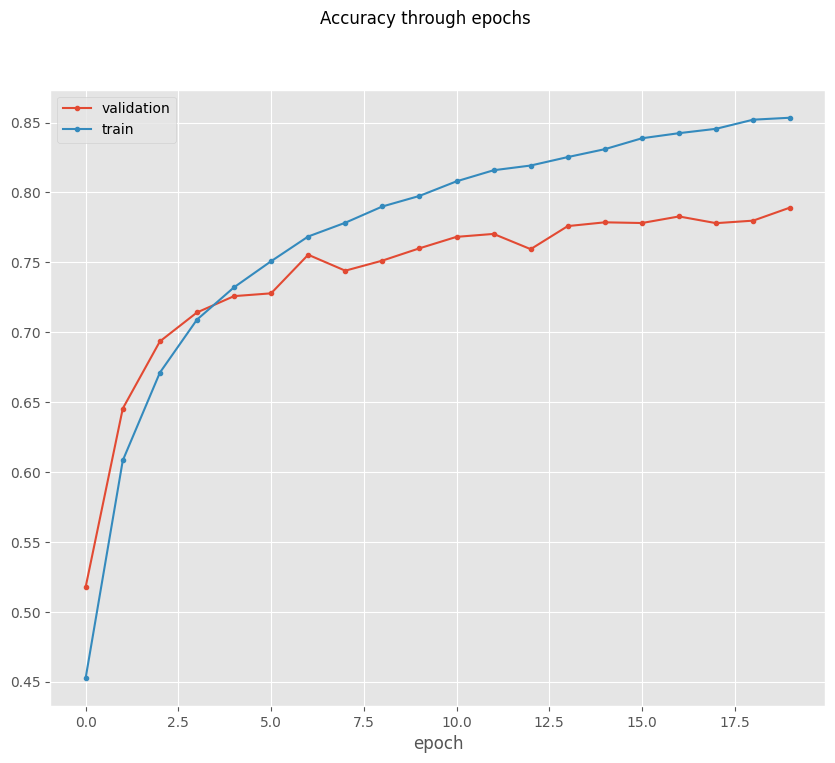

In [33]:
val_acc = pd.read_csv("val_acc.csv")["Value"]
train_acc = pd.read_csv("train_acc.csv")["Value"]
plt.plot(val_acc, marker=".", label="validation")
plt.plot(train_acc, marker=".", label="train")
plt.xlabel("epoch")
plt.suptitle("Accuracy through epochs")
plt.legend()
plt.show()

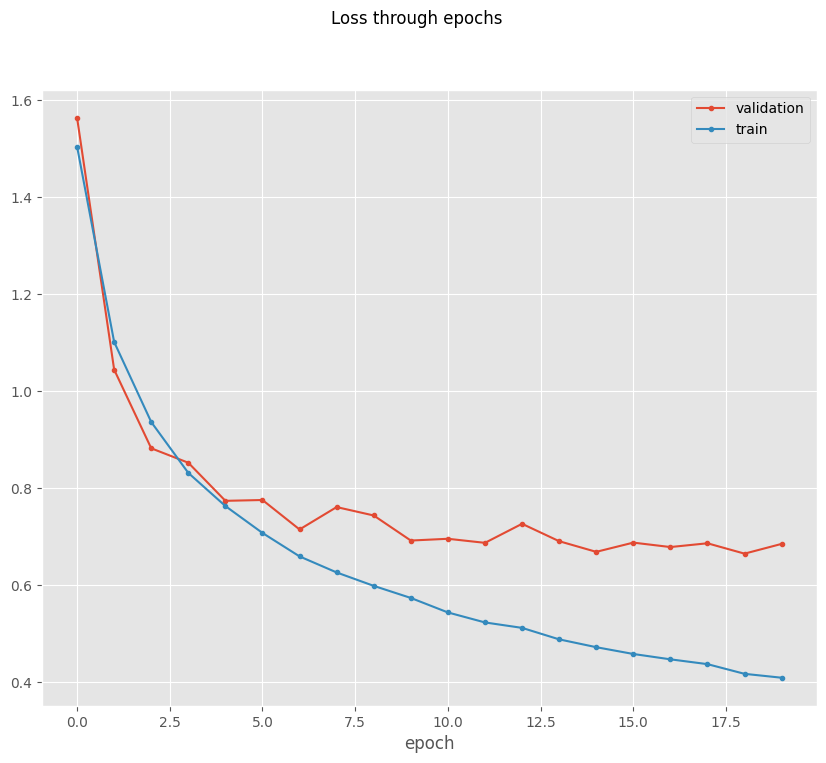

In [34]:
val_acc = pd.read_csv("val_loss.csv")["Value"]
train_acc = pd.read_csv("train_loss.csv")["Value"]
plt.plot(val_acc, marker=".", label="validation")
plt.plot(train_acc, marker=".", label="train")
plt.xlabel("epoch")
plt.suptitle("Loss through epochs")
plt.legend()
plt.show()

In [35]:
y_pred_ = model.predict(x_test)
y_pred = np.argmax(y_pred_, axis=1)
y_true = np.reshape(y_test, (1, -1))[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [36]:
print("Model quality on test set:")
print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision: {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F1-score: {metrics.f1_score(y_true, y_pred, average='weighted')}")
print(f"AUC: {metrics.roc_auc_score(y_true, y_pred_, multi_class='ovo')}")

Model quality on test set:
Accuracy: 0.783
Precision: 0.7821950973078716
Recall: 0.783
F1-score: 0.7809612641068381
AUC: 0.9739311666666667


За допомогою батч-нормалізації та дропаут шарів ми змогли прибрати досить помітне зростання функції втрат на валідаційній множині, покращили точність на валідаційній множині, уникнули перенавчання та досягнули кращих показників якості на тестовій множині

Додамо повнозв`язний та дропаут шари безпосередньо перед вихідним шаром

In [37]:
model = Sequential()

model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

/home/ilyahl/.local/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,502 (8.27 MB)

 Trainable params: 2,168,432 (8.27 MB)

 Non-trainable params: 70 (280.00 B)

In [40]:
model.fit(x_train, y_train, batch_size=200, epochs=20, validation_split=0.2, callbacks=[tensorboard_callback], verbose=1);

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 201ms/step - accuracy: 0.2782 - loss: 2.0428 - val_accuracy: 0.5252 - val_loss: 1.6002
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 45s 223ms/step - accuracy: 0.5409 - loss: 1.2676 - val_accuracy: 0.5931 - val_loss: 1.1835
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 45s 226ms/step - accuracy: 0.6240 - loss: 1.0640 - val_accuracy: 0.6640 - val_loss: 0.9376
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 46s 229ms/step - accuracy: 0.6619 - loss: 0.9589 - val_accuracy: 0.7071 - val_loss: 0.8297
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 46s 231ms/step - accuracy: 0.6964 - loss: 0.8622 - val_accuracy: 0.7185 - val_loss: 0.8054
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 46s 232ms/step - accuracy: 0.7228 - loss: 0.7827 - val_accuracy: 0.7450 - val_loss: 0.7316
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 46s 232ms/step - accuracy: 0.7428 - loss: 0.7262 - val_accuracy: 0.7427 - val_loss: 0.7382
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 47s 233ms/step - accuracy: 0.7574 - loss: 0

In [41]:
%tensorboard --logdir /home/ilyahl/Documents/Education/bachelor/3_course/2_semester/decision_support_systems/lab4/log

Reusing TensorBoard on port 6006 (pid 51601), started 5:18:19 ago. (Use '!kill 51601' to kill it.)

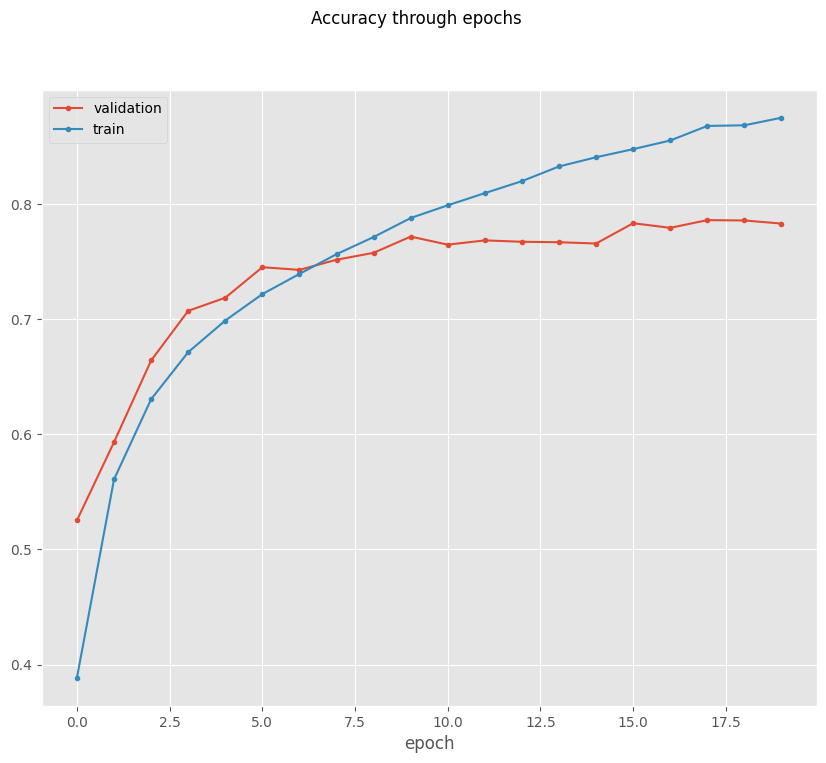

In [42]:
val_acc = pd.read_csv("val_acc.csv")["Value"]
train_acc = pd.read_csv("train_acc.csv")["Value"]
plt.plot(val_acc, marker=".", label="validation")
plt.plot(train_acc, marker=".", label="train")
plt.xlabel("epoch")
plt.suptitle("Accuracy through epochs")
plt.legend()
plt.show()

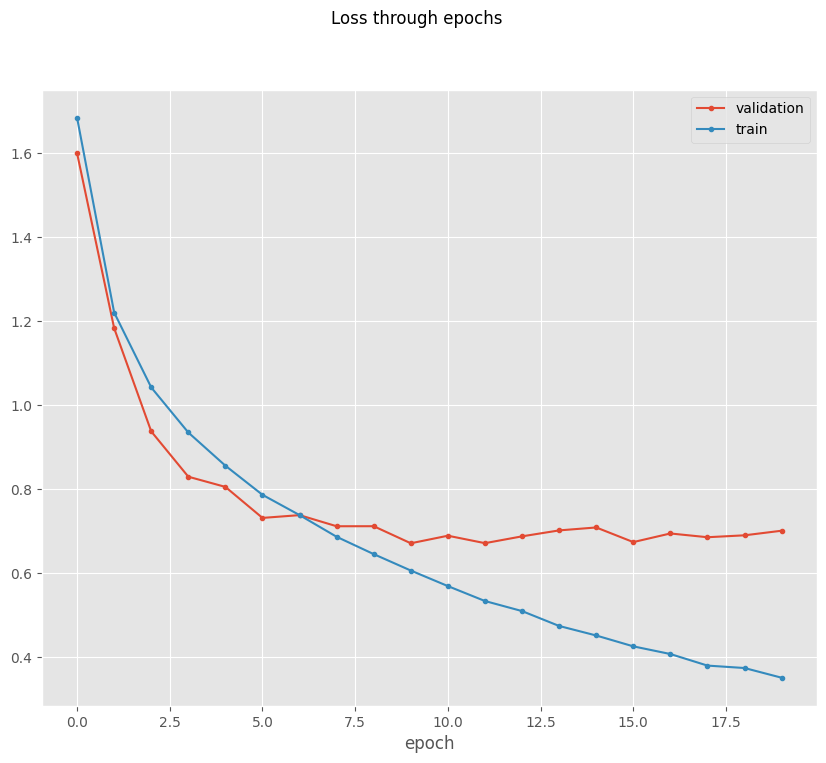

In [43]:
val_acc = pd.read_csv("val_loss.csv")["Value"]
train_acc = pd.read_csv("train_loss.csv")["Value"]
plt.plot(val_acc, marker=".", label="validation")
plt.plot(train_acc, marker=".", label="train")
plt.xlabel("epoch")
plt.suptitle("Loss through epochs")
plt.legend()
plt.show()

In [44]:
y_pred_ = model.predict(x_test)
y_pred = np.argmax(y_pred_, axis=1)
y_true = np.reshape(y_test, (1, -1))[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [45]:
print("Model quality on test set:")
print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision: {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F1-score: {metrics.f1_score(y_true, y_pred, average='weighted')}")
print(f"AUC: {metrics.roc_auc_score(y_true, y_pred_, multi_class='ovo')}")

Model quality on test set:
Accuracy: 0.7774
Precision: 0.780720377841291
Recall: 0.7774
F1-score: 0.7771114408420312
AUC: 0.9721688166666667


Дана модель поводить себе найбільш стабільно серед усіх побудованих при навчанні, має найкращі показники на валідаційному наборі, проте на тестовій множині показники якості виявились на одну соту гіршими ніж в попередній моделі, що не є дуже суттєвим. Отже, можемо сказати, що побудована за даним принципом модель є найбільш прийнятною. Досягти такої точності за допомогою багатошарового персептрону було б навряд чи можливим через занадто велику кількість параметрів та повноту зв'язків.

Наведемо декілька прикладів класифікації за допомогою даної моделі

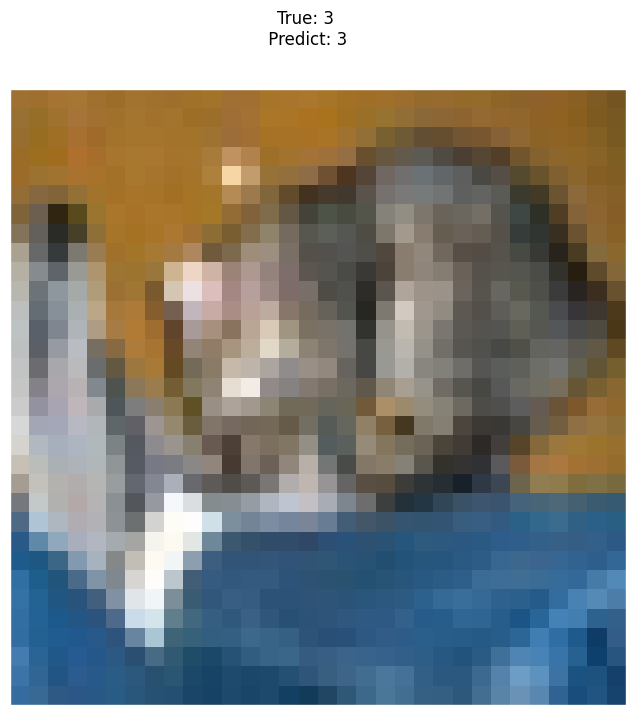

In [47]:
plt.imshow(x_test[0])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[0][0]}\n Predict: {y_pred[0]}")
plt.show()

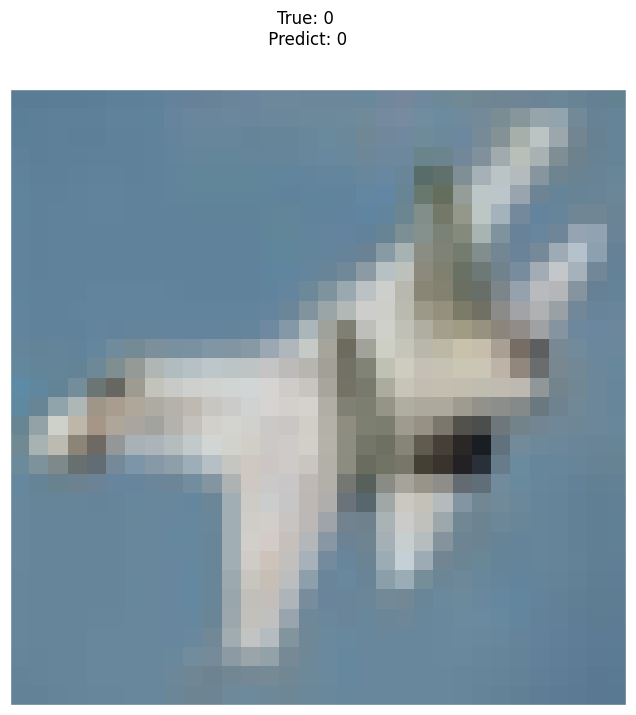

In [48]:
plt.imshow(x_test[10])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[10][0]}\n Predict: {y_pred[10]}")
plt.show()

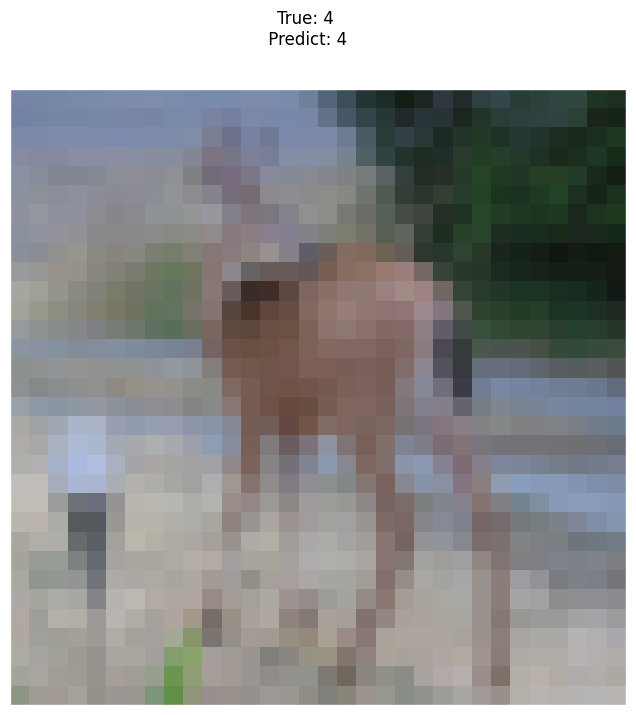

In [49]:
plt.imshow(x_test[100])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[100][0]}\n Predict: {y_pred[100]}")
plt.show()

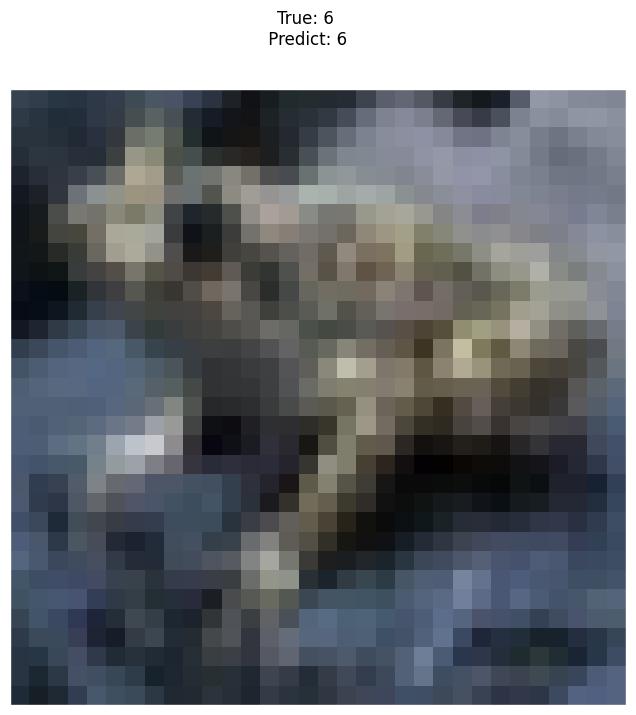

In [51]:
plt.imshow(x_test[152])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[152][0]}\n Predict: {y_pred[152]}")
plt.show()

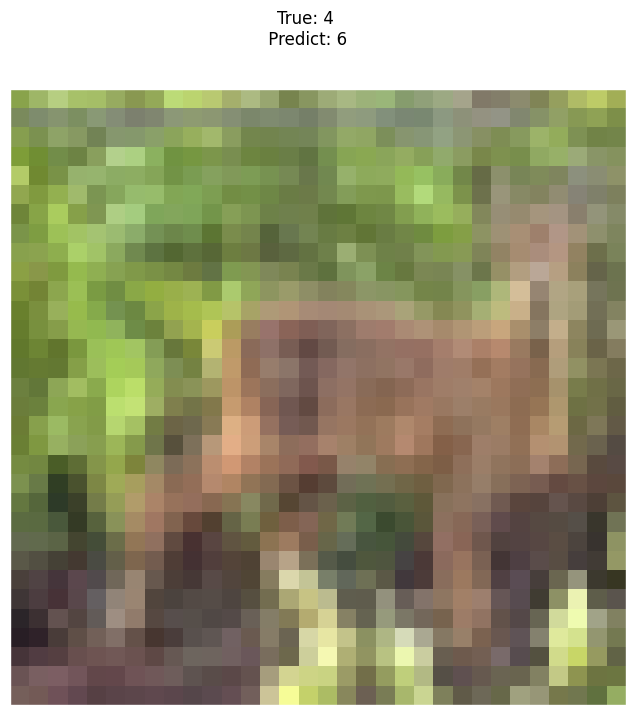

In [60]:
plt.imshow(x_test[2500])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[2500][0]}\n Predict: {y_pred[2500]}")
plt.show()